# Q1. 
  ## a. 請至 Kaggle 找 titanic dataset 
  ## b. 使用 SVM 簡單套用 model = SVC()
  ## c. 查看 confusion matrix and accuracy 指標

In [ ]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Train_Data = pd.read_csv("train.csv")
# Test_Data = pd.read_csv("test.csv")

# 填補年齡遺漏值
Age_Median = np.nanmedian(Train_Data['Age'])
New_Age_Data = np.where(Train_Data['Age'].isnull(), Age_Median, Train_Data['Age'])
Train_Data['Age'] = New_Age_Data
# print(New_Age_Data)

Data = Train_Data[['Pclass', 'Age', 'Sex']]
Data = pd.get_dummies(Data)
# print(Data)

Label = Train_Data['Survived']
# print(Label)

# 建立訓練與測試資料
X_train, X_test, Y_train, Y_test = train_test_split(Data, Label, test_size = 0.2, random_state = 0) 
# print(X_train)

model = SVC().fit(X_train, Y_train)

Test_score = model.score(X_test, Y_test)
Test_pred = model.predict(X_test)
Test_matrix = confusion_matrix(Y_test, Test_pred)
print("============================================")
print("Test Data：")
print("--------------------------------------------")
print("Accuracy:", Test_score)
print("Confusion Matrix:")
print(Test_matrix)
print("============================================")

Train_score = model.score(X_train, Y_train)
Train_pred = model.predict(X_train)
Train_matrix = confusion_matrix(Y_train, Train_pred)
print("============================================")
print("Train Data：")
print("--------------------------------------------")
print("Accuracy:", Train_score)
print("Confusion Matrix:")
print(Train_matrix)
print("============================================")


Test Data：
--------------------------------------------
Accuracy: 0.6256983240223464
Confusion Matrix:
[[106   4]
 [ 63   6]]
Train Data：
--------------------------------------------
Accuracy: 0.6348314606741573
Confusion Matrix:
[[420  19]
 [241  32]]


# Q2. 
  ## a. Iris data set 3 類
  ## b. 使用 SVM 並劃出 boundary 簡單套用 model = SVC()
  ## c. 查看 confusion matrix and accuracy 指標

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


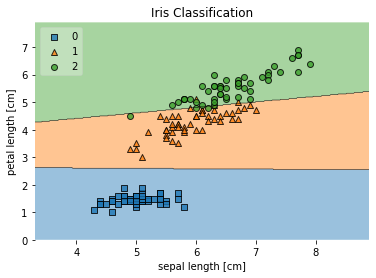

Test Data：
--------------------------------------------
Accuracy: 0.9666666666666667
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Train Data：
--------------------------------------------
Accuracy: 0.95
Confusion Matrix:
[[39  0  0]
 [ 0 33  4]
 [ 0  2 42]]


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

model = SVC(kernel = 'linear')
model.fit(X, y)

plot_decision_regions(X, y, clf=model, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Iris Classification')
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
Test_score = model.score(X_test, Y_test)
Test_pred = model.predict(X_test)
Test_matrix = confusion_matrix(Y_test, Test_pred)
print("============================================")
print("Test Data：")
print("--------------------------------------------")
print("Accuracy:", Test_score)
print("Confusion Matrix:")
print(Test_matrix)
print("============================================")

Train_score = model.score(X_train, Y_train)
Train_pred = model.predict(X_train)
Train_matrix = confusion_matrix(Y_train, Train_pred)
print("============================================")
print("Train Data：")
print("--------------------------------------------")
print("Accuracy:", Train_score)
print("Confusion Matrix:")
print(Train_matrix)
print("============================================")

# Q3. 
  ## a. Iris Dataset
  ## b. 一對一法( one-verus-one, OVO SVMs )
  ## c. 一對多法( one-verus-rest, OVR SVMs )

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

X = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) 

svc_model = SVC()
# one-versus-one model build
ovo_model = OneVsOneClassifier(svc_model)
ovo_model.fit(X_train, Y_train)
# one-versus-rest model build
ovr_model = OneVsRestClassifier(svc_model)
ovr_model.fit(X_train, Y_train)

ovo_score = ovo_model.score(X_test, Y_test)
ovr_score = ovr_model.score(X_test, Y_test)

ovo_Test_pred = ovo_model.predict(X_test)
ovo_Test_matrix = confusion_matrix(Y_test, ovo_Test_pred)
print("============================================")
print("one-versus-one(use test data)：")
print("--------------------------------------------")
print("Accuracy:", ovo_score)
print("Confusion Matrix:")
print(ovo_Test_matrix)
print("============================================")

ovr_Test_pred = ovr_model.predict(X_test)
ovr_Test_matrix = confusion_matrix(Y_test, ovr_Test_pred)
print("============================================")
print("one-versus-rest(use test data)：")
print("--------------------------------------------")
print("Accuracy:", ovr_score)
print("Confusion Matrix:")
print(ovr_Test_matrix)
print("============================================")



one-versus-one(use test data)：
--------------------------------------------
Accuracy: 0.9466666666666667
Confusion Matrix:
[[21  0  0]
 [ 0 29  1]
 [ 0  3 21]]
one-versus-rest(use test data)：
--------------------------------------------
Accuracy: 0.92
Confusion Matrix:
[[21  0  0]
 [ 0 29  1]
 [ 0  5 19]]


# Q4. 
  ## a. 進行 SVC 優化 (可進行超參數優化或是比對策略的優或)
  ## b. 比對策略：OVR, OVO, DAG, hirachical
  ## c. 超參數優化：Grid Search, meta-heurisitic, Optuna

In [ ]:
pip install Optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 27.3 MB/s 
     |████████████████████████████████| 209 kB 71.3 MB/s 
     |████████████████████████████████| 81 kB 10.4 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 112 kB 73.1 MB/s 
     |████████████████████████████████| 147 kB 77.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=331b4e8c6a7ac17b2ee41824fff5e034ea76a554e0a71c33a0df0b434f2fa7d0
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_optimization_history


def objective(trial, X=X, y=y):

  params = {
      "kernel" :  trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"]),
      "C" : trial.suggest_float("C", 0.0, 10.0 ),
      "gamma" : trial.suggest_float("gamma", 0.0, 10.0 ),
      "degree" : trial.suggest_int("degree", 0, 5 )
  }

  clf = SVC(**params)
  clf.fit(X_train, Y_train)
  return clf.score(X_test, Y_test)

X = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state = 0)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 20)


# Showing optimization results
print('Number of finished trials:', len(study.trials))
print('Best trial parameters:', study.best_trial.params)
print('Best score:', study.best_value)

plotly_config = {"staticPlot": True}
fig = plot_optimization_history(study)
fig.show(config=plotly_config)

fig = plot_param_importances(study)
fig.show(config=plotly_config)

[I 2022-10-18 03:45:38,887] A new study created in memory with name: no-name-8392e4f6-1e08-40d7-8014-10255edb724c
[I 2022-10-18 03:45:38,898] Trial 0 finished with value: 0.28 and parameters: {'kernel': 'poly', 'C': 0.08726298311241498, 'gamma': 6.001711008511599, 'degree': 0}. Best is trial 0 with value: 0.28.
[I 2022-10-18 03:45:38,905] Trial 1 finished with value: 0.9733333333333334 and parameters: {'kernel': 'linear', 'C': 2.6598624498003174, 'gamma': 0.5548007724533788, 'degree': 4}. Best is trial 1 with value: 0.9733333333333334.
[I 2022-10-18 03:45:38,918] Trial 2 finished with value: 0.9733333333333334 and parameters: {'kernel': 'rbf', 'C': 0.42980256665888006, 'gamma': 2.6913935088720264, 'degree': 4}. Best is trial 1 with value: 0.9733333333333334.
[I 2022-10-18 03:45:38,927] Trial 3 finished with value: 0.28 and parameters: {'kernel': 'sigmoid', 'C': 5.502572064402049, 'gamma': 8.064774730403245, 'degree': 2}. Best is trial 1 with value: 0.9733333333333334.
[I 2022-10-18 03:

Number of finished trials: 20
Best trial parameters: {'kernel': 'linear', 'C': 2.6598624498003174, 'gamma': 0.5548007724533788, 'degree': 4}
Best score: 0.9733333333333334


# Q5
## 使用上面方法分類舊金山犯罪類型39種(評分 only on SVM 的處理)

In [ ]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import optuna
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split




train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 確認有無空值
# train.isnull().sum()

# 統計資料類型
cate_group = train.groupby(by='Category').size()

# 統計 Label 種類
cate_num = len(cate_group.index)

# 將 index 改變為每個單字字首大寫其餘小寫並回傳
cate_group.index = cate_group.index.map(string.capwords)

# 依造數量做排序(多→少)
cate_group.sort_values(ascending = False, inplace = True)

# Train 解析日期(年/月/日)
train['date'] = pd.to_datetime(train['Dates'])
train['year'] = train.date.dt.year
train['month'] = train.date.dt.month
train['day'] = train.date.dt.day
train['hour'] = train.date.dt.hour

# Test 解析日期(年/月/日)
test['date'] = pd.to_datetime(test['Dates'])
test['year'] = test.date.dt.year
test['month'] = test.date.dt.month
test['day'] = test.date.dt.day
test['hour'] = test.date.dt.hour

# 對分類目標做標籤化處理
Label = preprocessing.LabelEncoder()
Target = Label.fit_transform(train.Category)

# 處理不統一的特徵
Id = test['Id']
des = train['Descript']
res = train['Resolution']
train.drop(['Category', 'Descript', 'Resolution'], axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

# 合併數據
full = pd.concat([train, test], keys=['train', 'test'])

# 將 DayOfWeek 做 one hot encoder
week_dum = pd.get_dummies(full.DayOfWeek)

full.drop('Address', axis = 1, inplace = True)
dist = pd.get_dummies(full.PdDistrict)

full.drop(['Dates', 'date'], axis = 1, inplace = True)

full['newy'] = full['month'].apply(lambda x:1 if x == 1 or x == 2 else 0)
full['dark'] = full['hour'].apply(lambda x:1 if x >= 18 and x <= 24 else 0)

hour_dum = pd.get_dummies(full.hour)
year_dum = pd.get_dummies(full.year)
month_dum = pd.get_dummies(full.month)

full.drop(['month', 'hour', 'day', 'year', 'DayOfWeek', 'PdDistrict'], axis = 1, inplace = True)
full = pd.concat([full, week_dum, dist, year_dum, month_dum, hour_dum], axis = 1)

X_train, X_valid, Y_train, Y_valid = train_test_split(full[:train.shape[0]], Target, train_size = 0.7, random_state = 0)

model = SVC()
model.fit(X_train, Y_train)
model.score(X_valid, Y_valid)






/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
